In [0]:
import pandas as pd
df=pd.read_csv("/Volumes/workspace/default/netflix/netflix_cleaned.csv")
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 Min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [0]:
# Check total null values per column
null_counts = df.isnull().sum().sort_values(ascending=False)

print( "Null Values per Column:")
print(null_counts)

# (Optional) Check percentage of nulls
null_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
print("\nPercentage of Nulls per Column:")
print(null_percentage)

Null Values per Column:
date_added      10
show_id          0
type             0
title            0
director         0
cast             0
country          0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

Percentage of Nulls per Column:
date_added      0.113546
show_id         0.000000
type            0.000000
title           0.000000
director        0.000000
cast            0.000000
country         0.000000
release_year    0.000000
rating          0.000000
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64


In [0]:
# Convert 'date_added' to datetime and extract year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['year_added'] = df['year_added'].fillna(0)


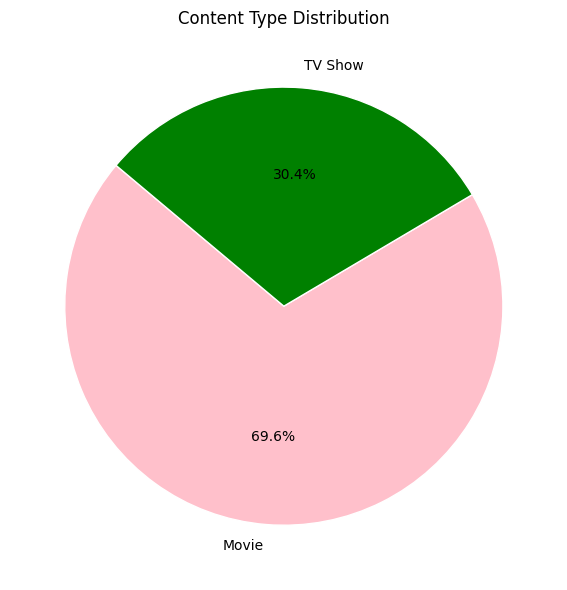

In [0]:
import matplotlib.pyplot as plt
#Distribution of Content Type
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', 
        colors=['pink', 'green'], startangle=140, wedgeprops={'edgecolor':'white'})
plt.title('Content Type Distribution')
plt.tight_layout()
plt.show()

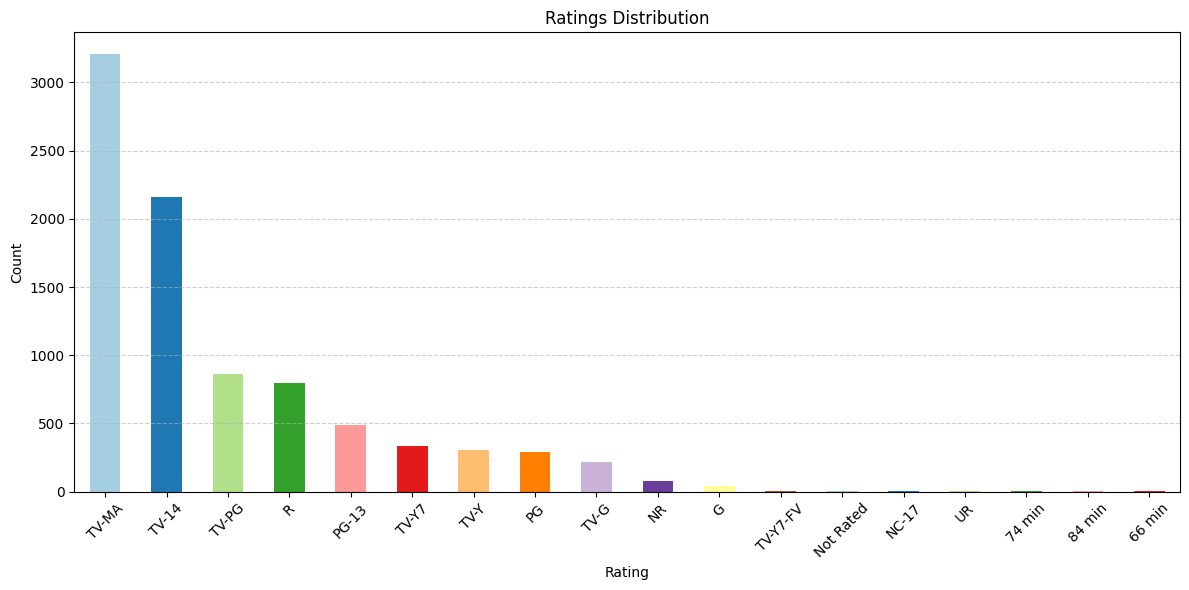

In [0]:
#Distribution of Ratings
plt.figure(figsize=(12,6))
df['rating'].value_counts().plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


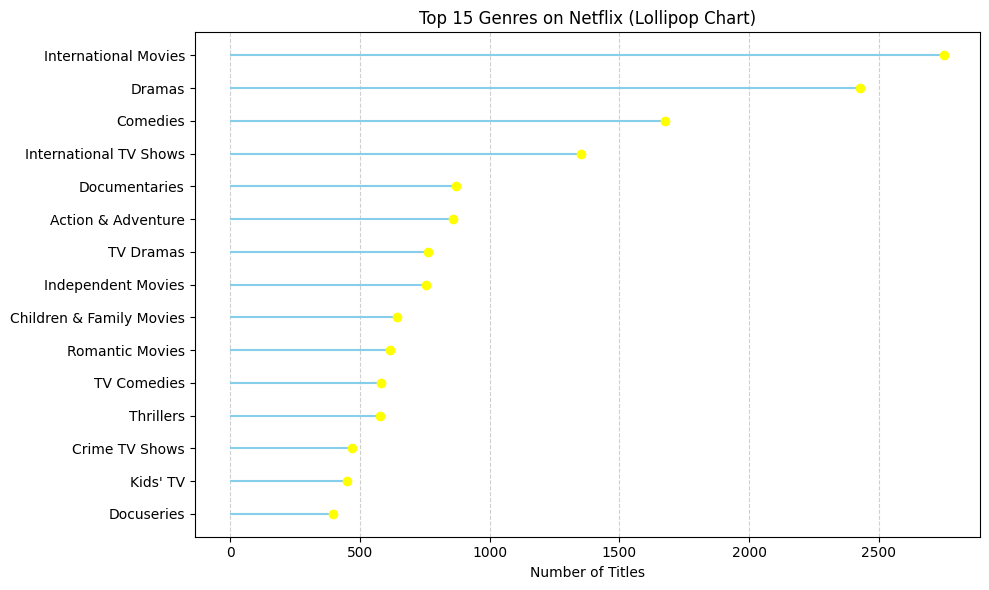

In [0]:
#Distribution of Genres
# Split the 'listed_in' column by commas and explode
genres = df['listed_in'].str.split(', ').explode().value_counts().head(15)
genres = genres.sort_values()  # sort ascending for vertical lollipop

plt.figure(figsize=(10,6))
plt.hlines(y=genres.index, xmin=0, xmax=genres.values, color='skyblue')
plt.plot(genres.values, genres.index, 'o', color='yellow')

plt.title('Top 15 Genres on Netflix (Lollipop Chart)')
plt.xlabel('Number of Titles')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


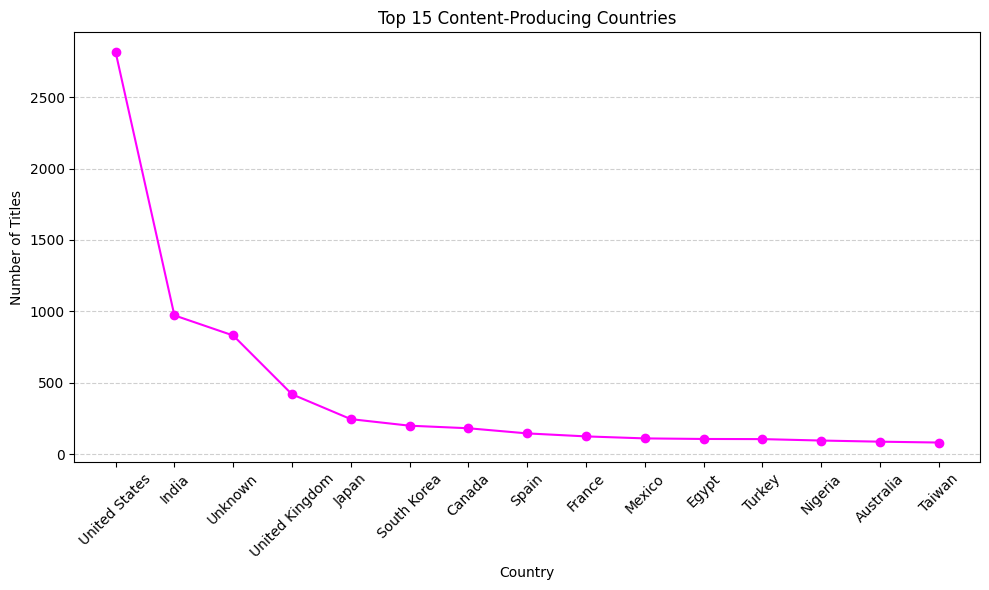

In [0]:
#Country-Level Contributions
top_countries = df['country'].value_counts().head(15).sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.plot(top_countries.index, top_countries.values, marker='o', color='magenta')
plt.title('Top 15 Content-Producing Countries')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


BIVARIATE

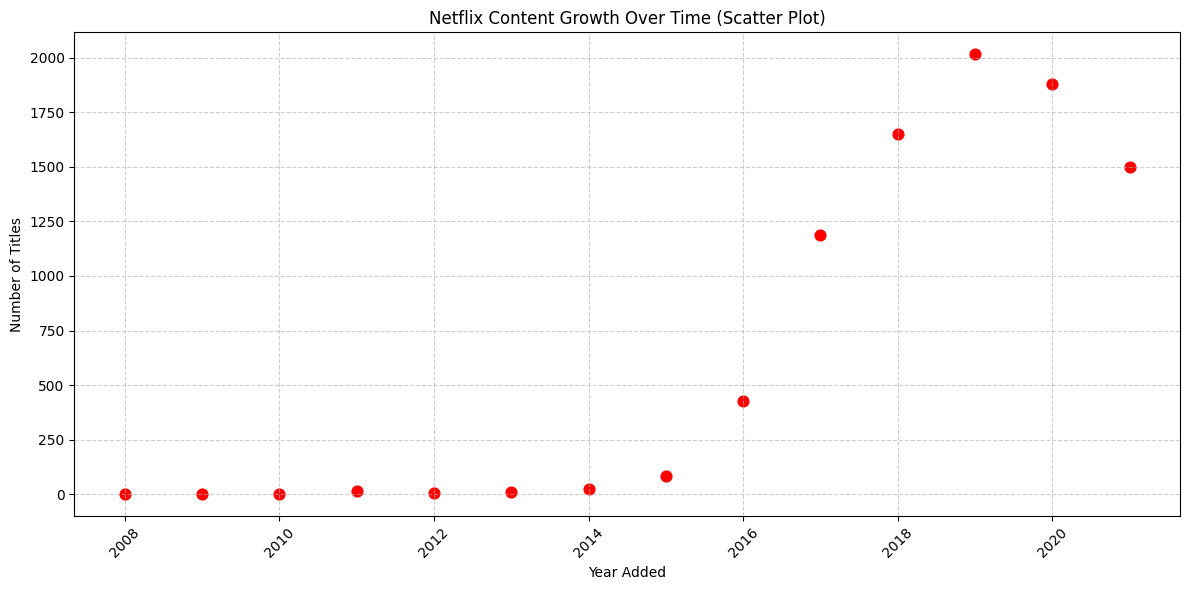

In [0]:

#Content Growth Over Time
# Make sure date_added is datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Group by year and count titles
content_growth = df.groupby('year_added').size().reset_index(name='count')
content_growth = content_growth.sort_values('year_added')

# Scatter plot
plt.figure(figsize=(12,6))
plt.scatter(content_growth['year_added'], content_growth['count'], color='red', s=60)

plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.title('Netflix Content Growth Over Time (Scatter Plot)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/home/spark-9bd8a7bc-ae5b-4ef5-a98d-70/.ipykernel/2446/command-7159982391788686-72221727:6: SyntaxWarning: invalid escape sequence '\d'
  movies['duration'].str.extract('(\d+)').astype(float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


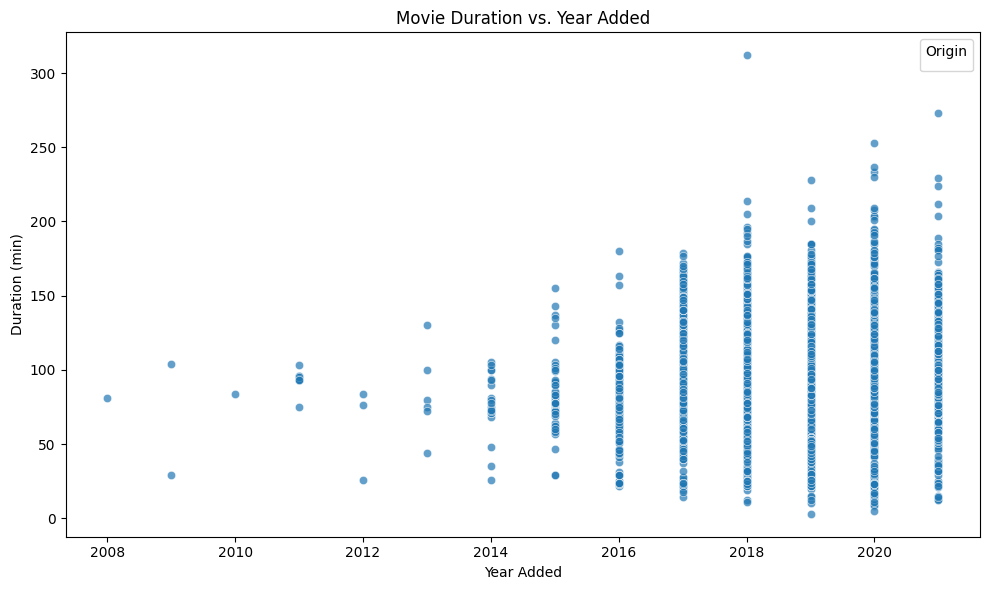

<unknown>:6: SyntaxWarning: invalid escape sequence '\d'


In [0]:
import seaborn as sns

# Only for movies with valid duration
movies = df[df['type'] == 'Movie'].copy()
movies['duration_num'] = (
    movies['duration'].str.extract('(\d+)').astype(float)
)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=movies,
    x='year_added',
    y='duration_num',
    alpha=0.7
)
plt.title('Movie Duration vs. Year Added')
plt.xlabel('Year Added')
plt.ylabel('Duration (min)')
plt.legend(title='Origin')
plt.tight_layout()
plt.show()

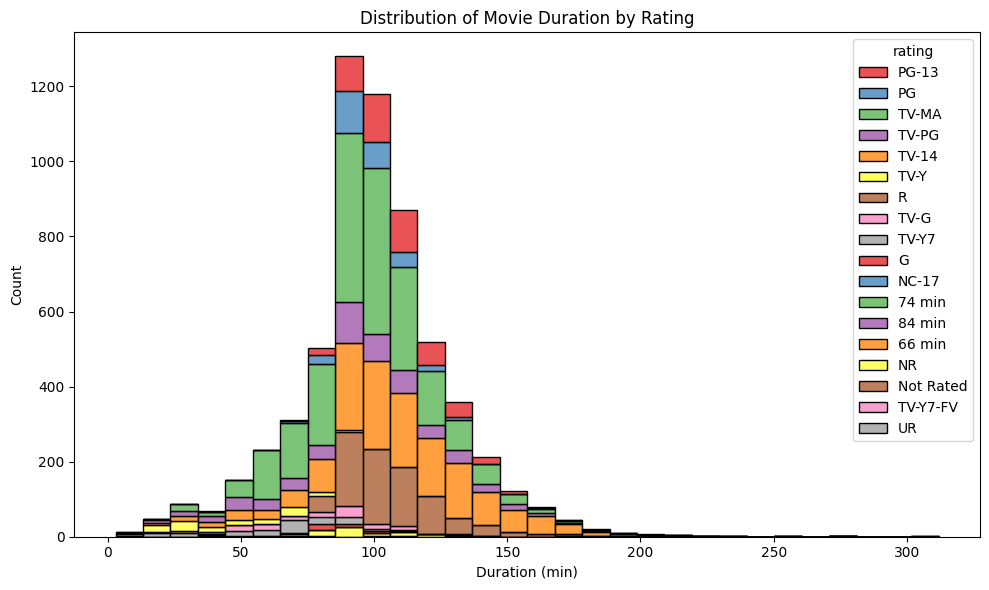

In [0]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=movies,
    x='duration_num',
    hue='rating',
    multiple='stack',
    palette='Set1',
    bins=30
)
plt.title('Distribution of Movie Duration by Rating')
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

FEATURE ENGINEERING

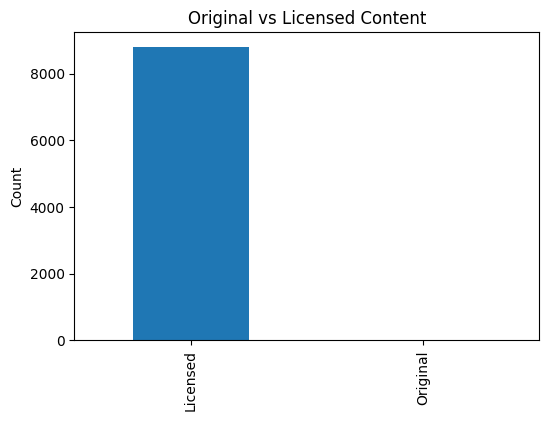

In [0]:
#Derived Feature – Original vs Licensed
df['origin_label'] = df['title'].str.contains('(?i)netflix', na=False).map({True: 'Original', False: 'Licensed'})


origin_counts = df['origin_label'].value_counts()

plt.figure(figsize=(6,4))
origin_counts.plot(kind='bar')
plt.title('Original vs Licensed Content')
plt.ylabel('Count')
plt.show()


In [0]:
# Extract primary genre from 'listed_in' column
df['primary_genre'] = df['listed_in'].str.split(',').str[0].str.strip()

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
/home/spark-9bd8a7bc-ae5b-4ef5-a98d-70/.ipykernel/2446/command-4916063536202881-23770176:7: SyntaxWarning: invalid escape sequence '\d'
  tv_shows['seasons_num'] = tv_shows['duration'].str.extract('(\d+)').astype(float)
/home/spark-9bd8a7bc-ae5b-4ef5-a98d-70/.ipykernel/2446/command-4916063536202881-23770176:17: SyntaxWarning: invalid escape sequence '\d'
  movies['duration_num'] = movies['duration'].str.extract('(\d+)').astype(float)


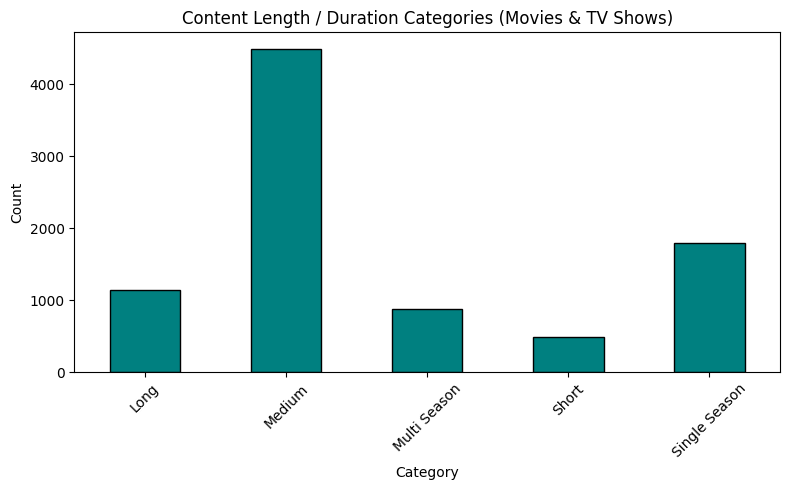

In [0]:
#Derived Feature – Content Length Categories
df['content_length_category'] = None

# --- TV Shows ---
tv_mask = df['type'] == 'TV Show';
tv_shows = df[tv_mask].copy();
tv_shows['seasons_num'] = tv_shows['duration'].str.extract('(\d+)').astype(float)
df.loc[tv_mask, 'content_length_category'] = pd.cut(
    tv_shows['seasons_num'],
    bins=[0, 1.5, float('inf')],
    labels=['Single Season', 'Multi Season']
)

# --- Movies ---
movie_mask = df['type'] == 'Movie';
movies = df[movie_mask].copy();
movies['duration_num'] = movies['duration'].str.extract('(\d+)').astype(float)
df.loc[movie_mask, 'content_length_category'] = pd.cut(
    movies['duration_num'],
    bins=[0, 60, 120, float('inf')],
    labels=['Short', 'Medium', 'Long']
)

# Check the column
length_counts = df['content_length_category'].value_counts().sort_index()
plt.figure(figsize=(8,5))
length_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Content Length / Duration Categories (Movies & TV Shows)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


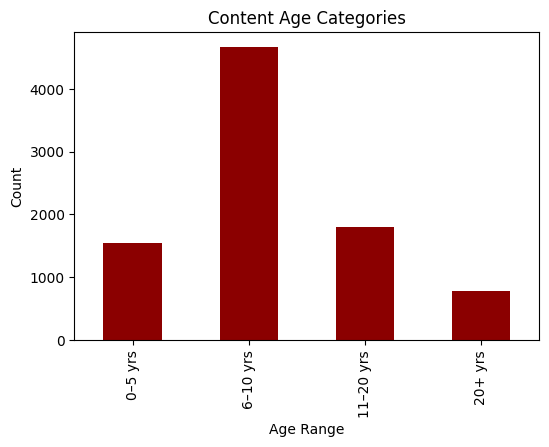

In [0]:
# --- Derived Feature - Content Age ---
df['content_age_years'] = 2025 - df['release_year']  # Add as a new feature

# Categorize content age
age_category = pd.cut(
    df['content_age_years'],
    bins=[0, 5, 10, 20, float('inf')],
    labels=['0–5 yrs', '6–10 yrs', '11–20 yrs', '20+ yrs']
)

# Count each category
age_counts = age_category.value_counts().sort_index()

# Plot
plt.figure(figsize=(6,4))
age_counts.plot(kind='bar', color='darkred')
plt.title('Content Age Categories')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()


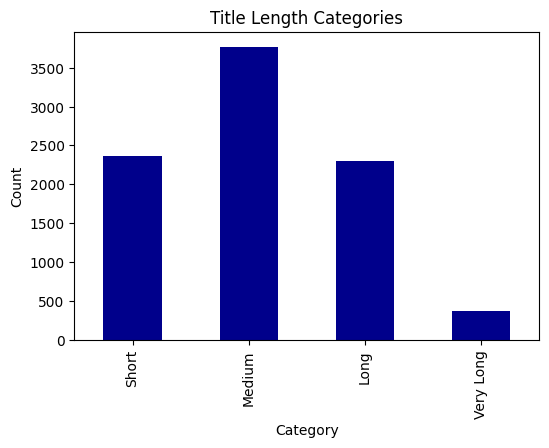

In [0]:

# --- Derived Feature: Title Length ---

df['title_length_category'] = pd.cut(
    df['title'].apply(lambda x: len(str(x))),
    bins=[0, 10, 20, 40, float('inf')],
    labels=['Short', 'Medium', 'Long', 'Very Long']
)


# Count each category for plotting
title_counts = df['title_length_category'].value_counts().sort_index()

# Plot
plt.figure(figsize=(6,4))
title_counts.plot(kind='bar', color='darkblue')
plt.title('Title Length Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [0]:

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,origin_label,primary_genre,content_length_category,content_age_years,title_length_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 Min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,Licensed,Documentaries,Medium,5,Medium
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,Licensed,International TV Shows,Multi Season,4,Medium
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,Licensed,Crime TV Shows,Single Season,4,Short
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,Licensed,Docuseries,Single Season,4,Long
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,Licensed,International TV Shows,Multi Season,4,Medium


In [0]:
df.to_csv('netflix_feature.csv', index=False)